In [7]:
import os


required_paths = ["/ai4eutils", "/CameraTraps", "/yolov5"]
python_path = os.environ.get("PYTHONPATH", "")
root_path = os.getcwd()

for path in required_paths:
    if not any(p.endswith(path) for p in python_path.split(":")):
        python_path += f":{root_path}/data/external{path}"

os.environ["PYTHONPATH"] = python_path

!echo "PYTHONPATH: $PYTHONPATH"

PYTHONPATH: :/Users/litto/WORKSPACE/MegaClassifier/data/external/ai4eutils:/Users/litto/WORKSPACE/MegaClassifier/data/external/CameraTraps:/Users/litto/WORKSPACE/MegaClassifier/data/external/yolov5


In [8]:
IMAGES_FOLDER = os.path.abspath("./resources/images")
MODEL_FILE = os.path.abspath("./models/MegaDetector/md_v5a.0.0.pt")

OUTPUT_FILE = os.path.abspath("./resources/json/example.json")
BOUNDING_BOX_FOLDER = os.path.abspath("./resources/bounding_boxes")

print(f"IMAGES_FOLDER:       {IMAGES_FOLDER}")
print(f"MODEL_FILE:          {MODEL_FILE}")
print()
print(f"OUTPUT_FILE:         {OUTPUT_FILE}")
print(f"BOUNDING_BOX_FOLDER: {BOUNDING_BOX_FOLDER}")

IMAGES_FOLDER:       /Users/litto/WORKSPACE/MegaClassifier/resources/images
MODEL_FILE:          /Users/litto/WORKSPACE/MegaClassifier/models/MegaDetector/md_v5a.0.0.pt

OUTPUT_FILE:         /Users/litto/WORKSPACE/MegaClassifier/resources/json/example.json
BOUNDING_BOX_FOLDER: /Users/litto/WORKSPACE/MegaClassifier/resources/bounding_boxes


In [9]:
!python ./data/external/CameraTraps/detection/run_detector_batch.py "$MODEL_FILE" "$IMAGES_FOLDER" "$OUTPUT_FILE" --recursive

2 image files found in the input directory
PyTorch reports 0 available CUDA devices
GPU available: False
Using PyTorch version 1.10.1
Fusing layers... 
Model summary: 574 layers, 139990096 parameters, 0 gradients
Loaded model in 1.43 seconds
Loaded model in 1.43 seconds
100%|█████████████████████████████████████████████| 2/2 [00:05<00:00,  2.63s/it]
Finished inference for 2 images in 7.05 seconds
Output file saved at /Users/litto/WORKSPACE/MegaClassifier/resources/json/example.json
Done!


In [10]:
!python ./data/external/CameraTraps/visualization/visualize_detector_output.py "$OUTPUT_FILE" "$BOUNDING_BOX_FOLDER" --images_dir "$IMAGES_FOLDER"

detection_categories provided
Detector output file contains 2 entries.
Rendering detections above a confidence threshold of 0.8...
100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 60.34it/s]
Rendered detection results on 2 images, saved to /Users/litto/WORKSPACE/MegaClassifier/resources/bounding_boxes.


anno_~Users~litto~WORKSPACE~MegaClassifier~resources~images~example_1.jpg


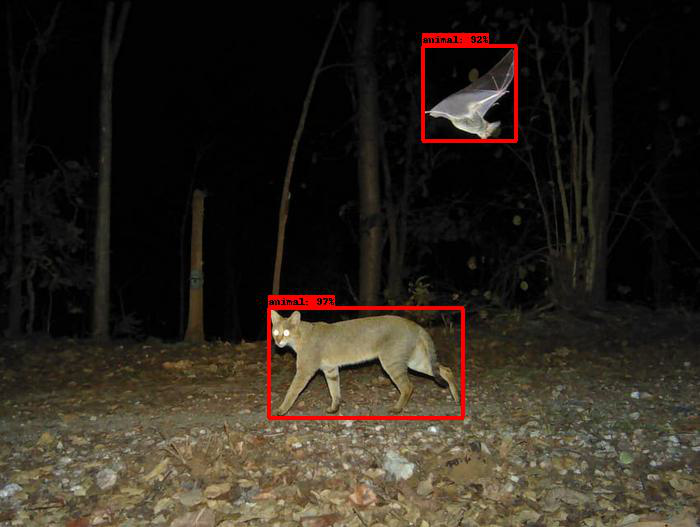

anno_~Users~litto~WORKSPACE~MegaClassifier~resources~images~example_2.jpg


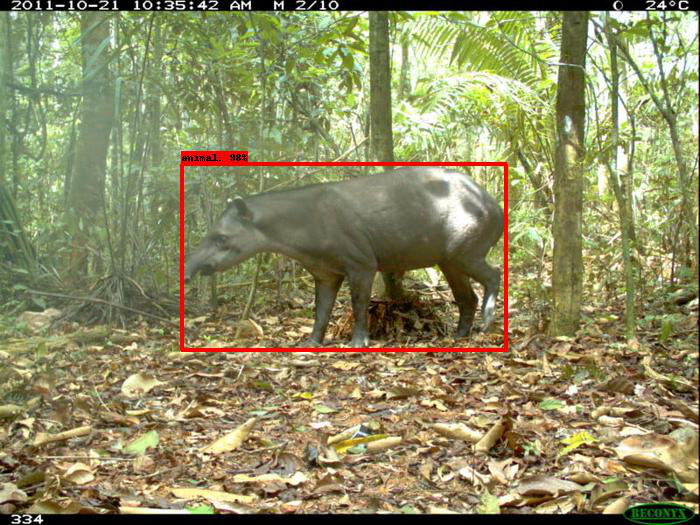

In [11]:
import os
from PIL import Image

for viz_file_name in os.listdir(BOUNDING_BOX_FOLDER):
    print(viz_file_name)
    im = Image.open(os.path.join(BOUNDING_BOX_FOLDER, viz_file_name))
    display(im)